#  TikTok Reviews Sentiment Analysis using Python

#### TikTok is a social media platform for creating, sharing, and discovering short-form videos. TikTok allows users to create short videos that can be up to 60 seconds and more, featuring music, sound effects, filters, and other creative tools. Users can also interact with other users' videos by commenting, liking, and sharing them. Despite its entertaining content, this application is not liked by everyone. If you skim through its reviews, you’ll find a mixture of hate and support for TikTok all over the world.

#### Sentiment analysis of reviews is a type of natural language processing (NLP) that involves analyzing the opinions, emotions, and attitudes expressed in a piece of text, typically a review or a feedback. The goal of sentiment analysis is to identify and extract subjective information from the text, such as whether the text expresses a positive, negative, or neutral sentiment or opinion.


#### Let's analyze TikTok Reviews to find out what people feel about the content of this app. 

##### This project will go through the task of TikTok reviews sentiment analysis.

The dataset I am gonna use for sentiment analysis is downloaded from kaggle. It was scrapped from TikTok reviews on Google play store and it has been processed to a format that fit for analysis.


the data can be downloaded here (https://www.kaggle.com/datasets/shivkumarganesh/tiktok-google-play-store-review/download?datasetVersionNumber=3)

### About Dataset

Import all python libraries needed;

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')

import plotly.express as px

[nltk_data] Downloading package stopwords to C:\Users\USER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


importing the dataset

In [3]:
df = pd.read_csv('tiktok_google_play_reviews.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
print(df.head())

                               reviewId              userName  \
0  68ccaec8-1415-4301-a85e-3004679a3a83          Cassie Moore   
1  d84cbfd3-6aa3-485c-aaf9-c5dca27dc966         Kaleb Plummer   
2  96618aa1-31e5-4259-8649-89b75d962f00           Rylee Maher   
3  078c0bda-598b-474e-a04e-d7cb3e6f6301  Kittykatelyn Romilly   
4  8e68c5cd-b12a-4206-a8da-6bfdbff44ae3      Loveness Malenga   

                                           userImage  \
0  https://play-lh.googleusercontent.com/a/ALm5wu...   
1  https://play-lh.googleusercontent.com/a-/ACNPE...   
2  https://play-lh.googleusercontent.com/a/ALm5wu...   
3  https://play-lh.googleusercontent.com/a-/ACNPE...   
4  https://play-lh.googleusercontent.com/a-/ACNPE...   

                                             content  score  thumbsUpCount  \
0                                           No words      5              0   
1                              Great fun app so far!      5              0   
2  The app would get a higher rating b

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460287 entries, 0 to 460286
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              460287 non-null  object
 1   userName              460287 non-null  object
 2   userImage             460287 non-null  object
 3   content               460271 non-null  object
 4   score                 460287 non-null  int64 
 5   thumbsUpCount         460287 non-null  int64 
 6   reviewCreatedVersion  333953 non-null  object
 7   at                    460287 non-null  object
 8   replyContent          260 non-null     object
 9   repliedAt             260 non-null     object
dtypes: int64(2), object(8)
memory usage: 35.1+ MB


From the first view of this dataset,there are missing data. 

In [12]:
df.head()

,content,score
0,No words,5
1,Great fun app so far!,5
2,The app would get a higher rating but I litera...,1
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5
4,Pictures and record,5


#### Data Preparation for sentiment analysis

This shows first 5 rows of the dataset.Basically, I only need two columns for the sentiment analysis; content, and score attributes. I will create a new dataset with just the two columns and further with TikTok reviews sentiment analysis.

In [7]:
df = df[['content', 'score']]
print(df.head())

                                             content  score
0                                           No words      5
1                              Great fun app so far!      5
2  The app would get a higher rating but I litera...      1
3  I WISH I COULD GIVE THIS A 100 PERCENT RATING ...      5
4                                Pictures and record      5


In [9]:
# checking for any null value
print(df.isnull().sum())

content    16
score       0
dtype: int64


There are 16 null values in the content column. Gonna drop the rows.

In [10]:
df = df.dropna()

In [11]:
# checking for null again for confirmation
print(df.isnull().sum())

content    0
score      0
dtype: int64


Now good to further my analysis.
Cleaning of text in the content column


In [14]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["content"] = df["content"].apply(clean)

Now let’s have a look at the percentages of ratings given to TikTok on the Google Play store

In [18]:
# making index and values columns
ratings = df['score'].value_counts()
numbers = ratings.index
quantity = ratings.values

plotting a donut chart to have a look on percentage of ratings given to TikTik on the Google play store

In [24]:
fig = px.pie(df, values = quantity, names = numbers, hole = 0.5)
fig.show()

73.6% of the users have given five ratings to TikTok, and 13.5% of the users have rated it with 1.

Checking for kind of words the users used in the reviews of TikTok

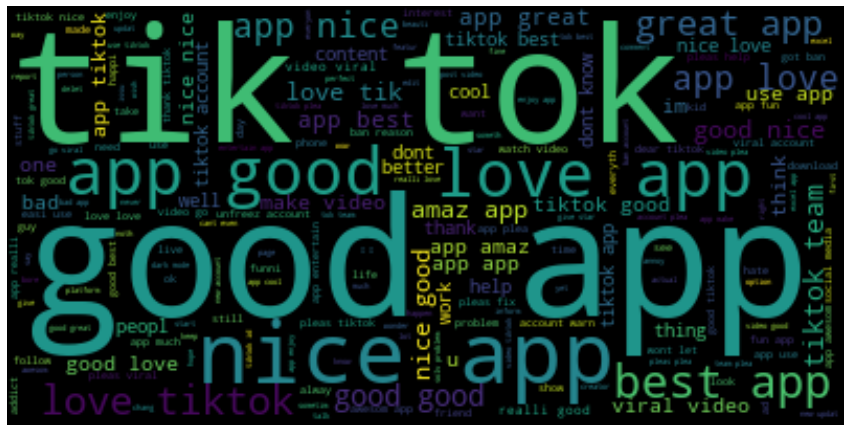

In [25]:
text = " ".join(i for i in df.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

This shows the kind of words users have been saying about TikTok.

##### Calculating Sentiment scores

Adding three more columns to the dataset; Positive, Negative, and Neutral to calculate the sentiment scores of the tweets

In [28]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["content"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["content"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["content"]]
df = df[["content", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\USER-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0                                               word     0.000      0.00   
1                                  great fun app far     0.787      0.00   
2  app would get higher rate liter cant sign seco...     0.000      0.07   
3             wish could give  percent rate love 💕 😘     0.633      0.00   
4                                      pictur record     0.000      0.00   

   Neutral  
0    1.000  
1    0.213  
2    0.930  
3    0.367  
4    1.000  


Checking out the kind words people used in the positive reviews of TikTok

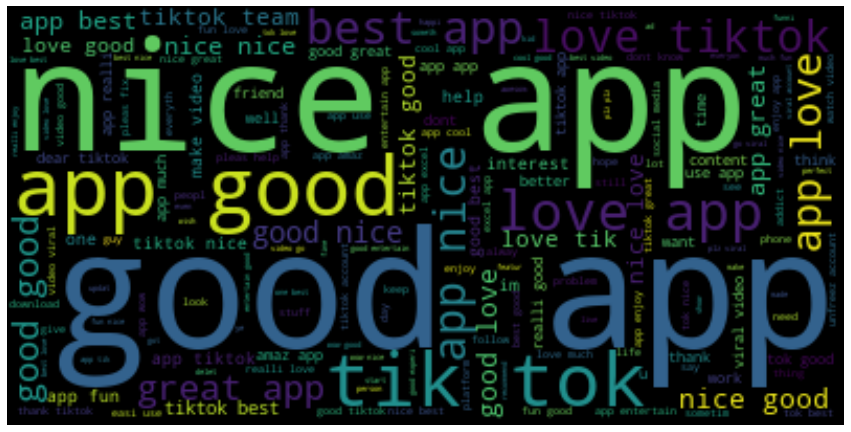

In [29]:
positive =' '.join([i for i in df['content'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The wordcloud contains the positive reviews of the users.


Checking out the kind words people used in the negative reviews of TikTok

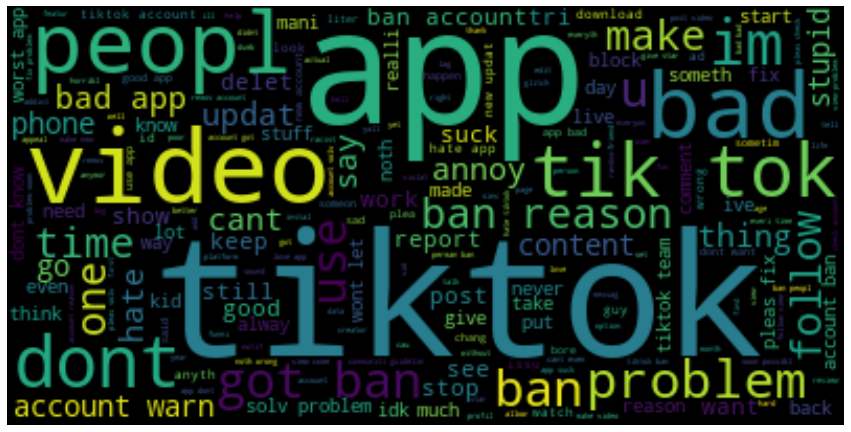

In [30]:
negative =' '.join([i for i in df['content'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Summary

The sentiment analysis involves analyzing the language used in user reviews and determining whether it expresses a positive or negative sentiment towards the TikTok app. This can be done using natural language processing techniques and machine learning algorithms.

After analyzing a large sample of TikTok users' reviews and ratings generated from TikTok google play, the sentiment analysis provided insights into the overall perception of the TikTok app among its users.The sentiment analysis reveals that the majority of users have a positive sentiment towards the app, with many praising its ease of use and entertainment value with 73.6% five stars ratings.

#### Conclusion

Conducting sentiment analysis on TikTok users' reviews and ratings using Python can provide valuable insights into user perceptions of the app. By analyzing the language used in these reviews, it is possible to determine the overall sentiment towards the app and identify areas where improvements could be made to enhance user satisfaction.